In [2]:
!pip install split-folders matplotlib opencv-python spic

In [3]:
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [4]:
splitfolders.ratio("Downloads/aug_msid/aug_mkp copy", output="Downloads/aug_msidDN121/aug_mkp copy/Xce_true", seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None, move=False)

Copying files: 5680 files [01:18, 72.08 files/s] 


In [6]:
datagen = ImageDataGenerator(rescale=1.0/255)

In [7]:
class_names = ['Chickenpox','Measles','Monkeypox','Normal']

In [8]:
train_generator = datagen.flow_from_directory(
    directory="Downloads/aug_msidDN121/aug_mkp copy/Xce_true/train",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)

Found 4543 images belonging to 4 classes.


In [9]:
valid_generator = datagen.flow_from_directory(
    directory="Downloads/aug_msidDN121/aug_mkp copy/Xce_true/val",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 565 images belonging to 4 classes.


In [10]:
test_generator = datagen.flow_from_directory(
    directory="Downloads/aug_msidDN121/aug_mkp copy/Xce_true/test/",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 572 images belonging to 4 classes.


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from PIL import Image
from tensorflow.keras.applications import Xception
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator

In [25]:
model = Xception(input_shape =(224,224,3), weights='imagenet', include_top=False, classes=4, classifier_activation="softmax")
#print(model.summary())

In [29]:
split_point = len(model.layers) // 2
for layer in (model.layers)[:split_point]:
    layer.trainable = False

In [30]:
Xce_model = Sequential()
Xce_model.add(model)
Xce_model.add(Flatten())
Xce_model.add(Dense(512, activation='relu'))
Xce_model.add(Dense(4, activation='softmax'))
print(model.summary())

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_4[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]

 ormalization)                                                                                    
                                                                                                  
 block4_sepconv2_act (Activ  (None, 28, 28, 728)          0         ['block4_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block4_sepconv2 (Separable  (None, 28, 28, 728)          536536    ['block4_sepconv2_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block4_sepconv2_bn (BatchN  (None, 28, 28, 728)          2912      ['block4_sepconv2[0][0]']     
 ormalization)                                                                                    
          

 ation)                                                                                           
                                                                                                  
 block7_sepconv1 (Separable  (None, 14, 14, 728)          536536    ['block7_sepconv1_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block7_sepconv1_bn (BatchN  (None, 14, 14, 728)          2912      ['block7_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block7_sepconv2_act (Activ  (None, 14, 14, 728)          0         ['block7_sepconv1_bn[0][0]']  
 ation)                                                                                           
          

 block9_sepconv3_bn (BatchN  (None, 14, 14, 728)          2912      ['block9_sepconv3[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 add_35 (Add)                (None, 14, 14, 728)          0         ['block9_sepconv3_bn[0][0]',  
                                                                     'add_34[0][0]']              
                                                                                                  
 block10_sepconv1_act (Acti  (None, 14, 14, 728)          0         ['add_35[0][0]']              
 vation)                                                                                          
                                                                                                  
 block10_sepconv1 (Separabl  (None, 14, 14, 728)          536536    ['block10_sepconv1_act[0][0]']
 eConv2D) 

                                                                                                  
 block12_sepconv3_act (Acti  (None, 14, 14, 728)          0         ['block12_sepconv2_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 block12_sepconv3 (Separabl  (None, 14, 14, 728)          536536    ['block12_sepconv3_act[0][0]']
 eConv2D)                                                                                         
                                                                                                  
 block12_sepconv3_bn (Batch  (None, 14, 14, 728)          2912      ['block12_sepconv3[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 add_38 (A

In [31]:
Xce_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
epochs=15
history =Xce_model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs
)

Epoch 1/15
142/142 [==============================] - 2264s 16s/step - loss: 1.5160 - accuracy: 0.2545 - val_loss: 1.3863 - val_accuracy: 0.2549
Epoch 2/15
142/142 [==============================] - 2433s 17s/step - loss: 1.1048 - accuracy: 0.4884 - val_loss: 5.3576 - val_accuracy: 0.6195
Epoch 3/15
142/142 [==============================] - 1593s 11s/step - loss: 0.6468 - accuracy: 0.7422 - val_loss: 23.2326 - val_accuracy: 0.6973
Epoch 4/15
142/142 [==============================] - 1446s 10s/step - loss: 0.3460 - accuracy: 0.8943 - val_loss: 0.3591 - val_accuracy: 0.9062
Epoch 5/15
142/142 [==============================] - 2412s 17s/step - loss: 0.2412 - accuracy: 0.9403 - val_loss: 0.2375 - val_accuracy: 0.9327
Epoch 6/15
142/142 [==============================] - 2882s 20s/step - loss: 0.2116 - accuracy: 0.9459 - val_loss: 0.6298 - val_accuracy: 0.9150
Epoch 7/15
142/142 [==============================] - 5088s 36s/step - loss: 0.1110 - accuracy: 0.9696 - val_loss: 0.1839 - val_a

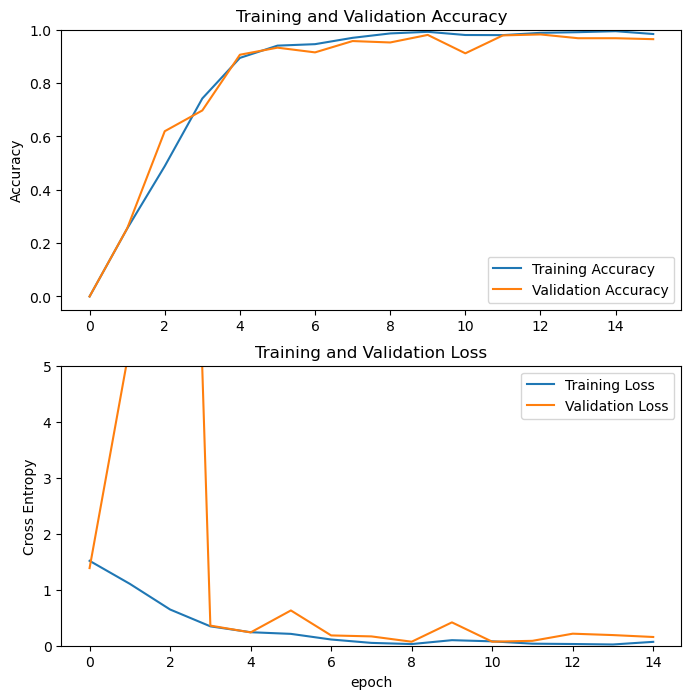

In [33]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [34]:
#Evaluate the model
test_loss, test_acc = Xce_model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc)

18/18 [==============================] - 279s 16s/step - loss: 0.1965 - accuracy: 0.9545
The test loss is:  0.19653388857841492
The best accuracy is:  0.9545454382896423


In [35]:
Xce_model.save('my_Xce_TF_model')

INFO:tensorflow:Assets written to: my_Xce_TF_model\assets


INFO:tensorflow:Assets written to: my_Xce_TF_model\assets


In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test dataset
predictions = Xce_model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

# Calculate the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Calculate precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)



from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'Xce_model' is not defined